# <h1><span style="color:#ff5733; background-color:#f0f0f0;">Predicting Children's Outdoor Play Using Decision Trees</span>


In [1]:
#!pip install joblib

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
data = {
    'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Weather': ['Sunny', 'Cloudy', 'Sunny', 'Cloudy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Cloudy', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Mild', 'Mild', 'Cool', 'Mild', 'Hot', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'Normal', 'High', 'High', 'Normal', 'High', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Weak', 'Strong', 'Strong', 'Strong', 'Strong', 'Weak', 'Strong', 'Weak', 'Strong'],
    'Play?': ['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)
df

,Day,Weather,Temperature,Humidity,Wind,Play?
0,1,Sunny,Hot,High,Weak,No
1,2,Cloudy,Hot,High,Weak,Yes
2,3,Sunny,Mild,Normal,Strong,Yes
3,4,Cloudy,Mild,High,Strong,Yes
4,5,Rainy,Mild,High,Strong,No
5,6,Rainy,Cool,Normal,Strong,No
6,7,Rainy,Mild,High,Weak,Yes
7,8,Sunny,Hot,High,Strong,No
8,9,Cloudy,Hot,Normal,Weak,Yes
9,10,Rainy,Mild,High,Strong,No


In [4]:
df_encoded = pd.get_dummies(df.drop(columns=['Play?']))
df_encoded
#the code drops the columns 'Day' and 'Play?' before encoding categorical variables

,Day,Weather_Cloudy,Weather_Rainy,Weather_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,1,0,0,1,0,1,0,1,0,0,1
1,2,1,0,0,0,1,0,1,0,0,1
2,3,0,0,1,0,0,1,0,1,1,0
3,4,1,0,0,0,0,1,1,0,1,0
4,5,0,1,0,0,0,1,1,0,1,0
5,6,0,1,0,1,0,0,0,1,1,0
6,7,0,1,0,0,0,1,1,0,0,1
7,8,0,0,1,0,1,0,1,0,1,0
8,9,1,0,0,0,1,0,0,1,0,1
9,10,0,1,0,0,0,1,1,0,1,0


In [5]:
x = df_encoded
y = df['Play?']

In [6]:
clf = DecisionTreeClassifier(criterion="entropy")
clf

DecisionTreeClassifier(criterion='entropy')

In [7]:
clf = clf.fit(x, y)
clf

DecisionTreeClassifier(criterion='entropy')

<h2><span style="color:#33ff99; background-color:#f0f0f0; padding: 5px;">Decision Tree</span>

In [8]:
tree_rules = export_text(clf, feature_names=list(x.columns))
print(tree_rules)

|--- Weather_Cloudy <= 0.50
|   |--- Temperature_Mild <= 0.50
|   |   |--- class: No
|   |--- Temperature_Mild >  0.50
|   |   |--- Weather_Rainy <= 0.50
|   |   |   |--- class: Yes
|   |   |--- Weather_Rainy >  0.50
|   |   |   |--- Wind_Weak <= 0.50
|   |   |   |   |--- class: No
|   |   |   |--- Wind_Weak >  0.50
|   |   |   |   |--- class: Yes
|--- Weather_Cloudy >  0.50
|   |--- class: Yes



<h2><span style="color:#33ff99; background-color:#f0f0f0; padding: 5px;">Visualization of Decision Tree</span>

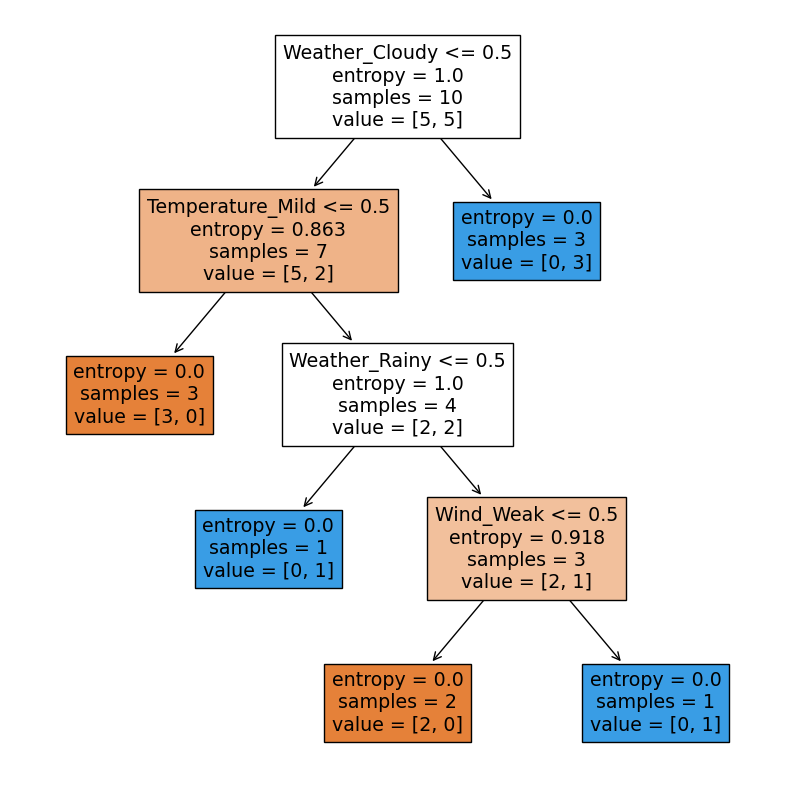

In [9]:
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=x.columns, filled=True)
plt.show()

<h2><span style="color:orange; background-color:#f0f0f0; padding: 5px;">Sample Prediction</span>

In [10]:
# Make prediction using the trained decision tree classifier
prediction = clf.predict(df_encoded.sample(1))
print("Prediction:", prediction)

Prediction: ['No']


### Sample Prediction

Based on our trained decision tree model, we randomly select a weather data from our data set that tells us whether the child will go outside (YES) or not (NO). This sample prediction shows that the child will go outside.

## Conclusion

In this project, we utilized a decision tree classifier to predict whether a child will go out to play based on weather conditions. By leveraging entropy and information gain, we constructed an interpretable model that provides insights into the relationship between weather factors and outdoor play.

Decision trees offer a simple yet effective approach for decision-making processes. However, it's essential to be mindful of overfitting, especially with complex datasets. Future work may involve exploring additional features and evaluating model performance against other algorithms.

This project demonstrates the practical application of decision trees in predictive modeling and highlights their usefulness in understanding decision-making scenarios.
